In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png
from bokeh.io.export import get_screenshot_as_png
import geopandas

In [2]:
tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')

In [3]:
tweets.sample(n = 5)

,id,keyword,location,text,target
2957,4248,drowning,NaN,forever drowning in my feelings.,0
3525,5039,eyewitness,"Bakersfield, California",Wake Up Kern County Eyewitness News Mornings a...,1
7538,10777,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1
6653,9533,terrorist,????? ???? ????,#UdhampurAgain 2 terrorist shot dead.. #Udhampur,1
4033,5727,forest%20fire,NaN,I had to grill for a school function. One of t...,0


In [4]:
ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')

In [5]:
ciudades.sample(n = 5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
4001,Buta,Buta,2.8200,24.7400,Congo (Kinshasa),CD,COD,Bas-Uélé,admin,45677.0,1180712204
1131,Luhans’k,Luhans'k,48.5698,39.3344,Ukraine,UA,UKR,Luhans’ka Oblast’,admin,452000.0,1804688214
7336,Brick,Brick,40.0600,-74.1098,United States,US,USA,New Jersey,NaN,75118.0,1840081606
13999,Manchester,Manchester,39.6584,-76.8881,United States,US,USA,Maryland,NaN,5348.0,1840005702
5520,Dalkeith,Dalkeith,55.8667,-3.0667,United Kingdom,GB,GBR,Midlothian,admin,NaN,1826152382


In [6]:
tweets['location'].isnull().sum()

2533

In [7]:
tweets['location'].isnull().mean()

0.33272034677525286

In [8]:
location_list = tweets['location'].tolist()

In [9]:
ciudades_ocurr = tweets['location'].value_counts()

In [10]:
ciudades_ocurr

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Australia                        18
Chicago, IL                      18
California                       17
Everywhere                       15
California, USA                  15
New York, NY                     15
San Francisco                    14
United Kingdom                   14
Florida                          14
Los Angeles                      13
Washington, D.C.                 13
Indonesia                        13
Toronto                          12
NYC                              12
Ireland                     

In [11]:
ciudades_list = ciudades['city_ascii']
ciudades_list = pd.DataFrame(ciudades_list)

In [12]:
ciudades_list['ocurrencia'] = 0

In [13]:
ciudades_list

,city_ascii,ocurrencia
0,Tokyo,0
1,New York,0
2,Mexico City,0
3,Mumbai,0
4,Sao Paulo,0
5,Delhi,0
6,Shanghai,0
7,Kolkata,0
8,Los Angeles,0
9,Dhaka,0


In [14]:
ciudades_list.shape

(15493, 2)

In [15]:
ciudades_list['city_ascii'].count()

15493

In [16]:
ciudades_list['veracidad'] = 0
ciudades_list['cant_verdaderos'] = 0

In [17]:
ciudades_list['veracidad'] = ciudades_list['veracidad'].astype(float)

In [18]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
dtype: object

In [19]:
tienenLaCiudad = pd.DataFrame(columns=('tweetDeLaCiudad', 'V/F'))
tienenLaCiudad['V/F'] = tweets['target']

Comparo cada ciudad del mundo con los tweets y busco si el nombre de la ciudad esta incluido en el campo "Location" de cada Tweet

In [20]:
#CUIDADO AL EJECUTAR ESTO xD
for x in range(ciudades_list['city_ascii'].count()):
    ciudad = ciudades_list.loc[x, 'city_ascii']
    if (len(ciudad) > 4):
        tienenLaCiudad['tweetDeLaCiudad'] = tweets.loc[:, 'location'].str.contains(ciudad, regex = False)
    else:
        tienenLaCiudad['tweetDeLaCiudad'] = (tweets.loc[:, 'location'] == ciudad)
        
    cant_tweets = tienenLaCiudad[tienenLaCiudad['tweetDeLaCiudad'] == True]['tweetDeLaCiudad'].count()
    verdaderos = tienenLaCiudad[(tienenLaCiudad['V/F'] == 1) & (tienenLaCiudad['tweetDeLaCiudad'] == True)]['V/F'].count()
    
    ciudades_list.loc[x, 'cant_verdaderos'] = verdaderos
    ciudades_list.loc[x, 'ocurrencia'] = cant_tweets
    if (cant_tweets != 0):
        ciudades_list.loc[x, 'veracidad'] = float(verdaderos)/float(cant_tweets)

In [21]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos
0,Tokyo,8,0.500000,4
1,New York,131,0.320611,42
2,Mexico City,1,0.000000,0
3,Mumbai,31,0.838710,26
4,Sao Paulo,2,0.500000,1
5,Delhi,10,0.600000,6
6,Shanghai,1,0.000000,0
7,Kolkata,3,0.333333,1
8,Los Angeles,53,0.358491,19
9,Dhaka,2,1.000000,2


In [22]:
Ciudades_Mas_10_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 10)

In [23]:
Top_populares = ciudades_list.loc[Ciudades_Mas_10_Tweets]

In [24]:
Top_populares = Top_populares.sort_values('ocurrencia', ascending = False)

In [25]:
Top_populares = Top_populares.drop_duplicates(['city_ascii'])

In [26]:
Top_populares

,city_ascii,ocurrencia,veracidad,cant_verdaderos
1,New York,131,0.320611,42
1388,London,108,0.342593,37
13458,California,77,0.519481,40
10449,Washington,67,0.626866,42
2638,Los Angeles,53,0.358491,19
24,Chicago,45,0.444444,20
4296,Florida,35,0.371429,13
7676,San Francisco,33,0.545455,18
3,Mumbai,31,0.838710,26
14904,Atlanta,30,0.366667,11


Text(0.5,1,'Ciudades con mayor cantidad de Tweets')

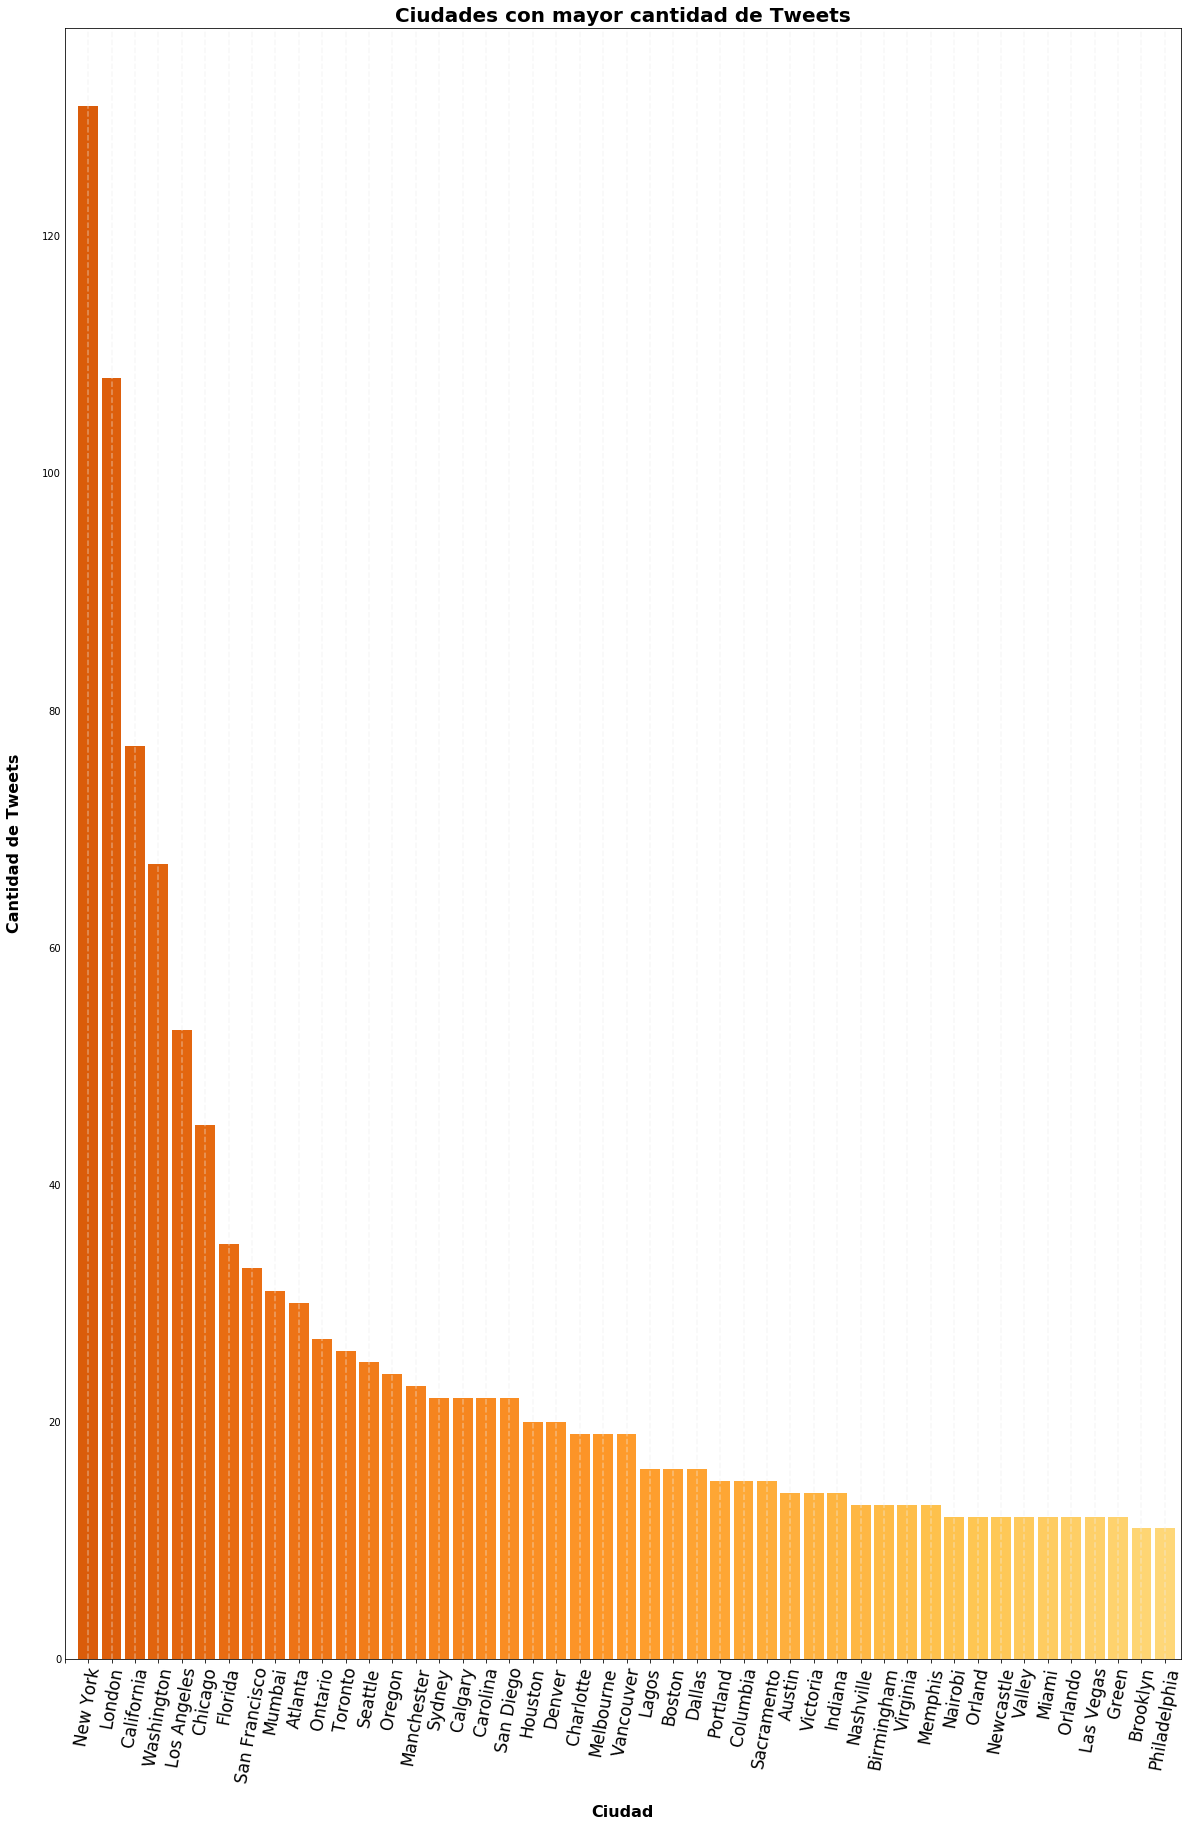

In [27]:
saltos = np.linspace(0.3, 0.7, 48)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('ocurrencia')
Top_populares_plot = Top_populares.plot(kind='bar', y ='ocurrencia', x = 'city_ascii', figsize=(20, 30), color=colores, width=0.85, legend=False)

plt.xticks(np.arange(0, 48, 1.0), fontsize = 17, rotation = 80)
plt.tick_params(axis='y', length=0)

#Top_populares_plot.spines['right'].set_visible(False)
#Top_populares_plot.spines['top'].set_visible(False)
#Top_populares_plot.spines['left'].set_visible(False)
#Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
    
plt.gca().invert_xaxis()

Top_populares_plot.set_xlabel("Ciudad", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Ciudades con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Veracidad promedio de los Tweets por ciudad')

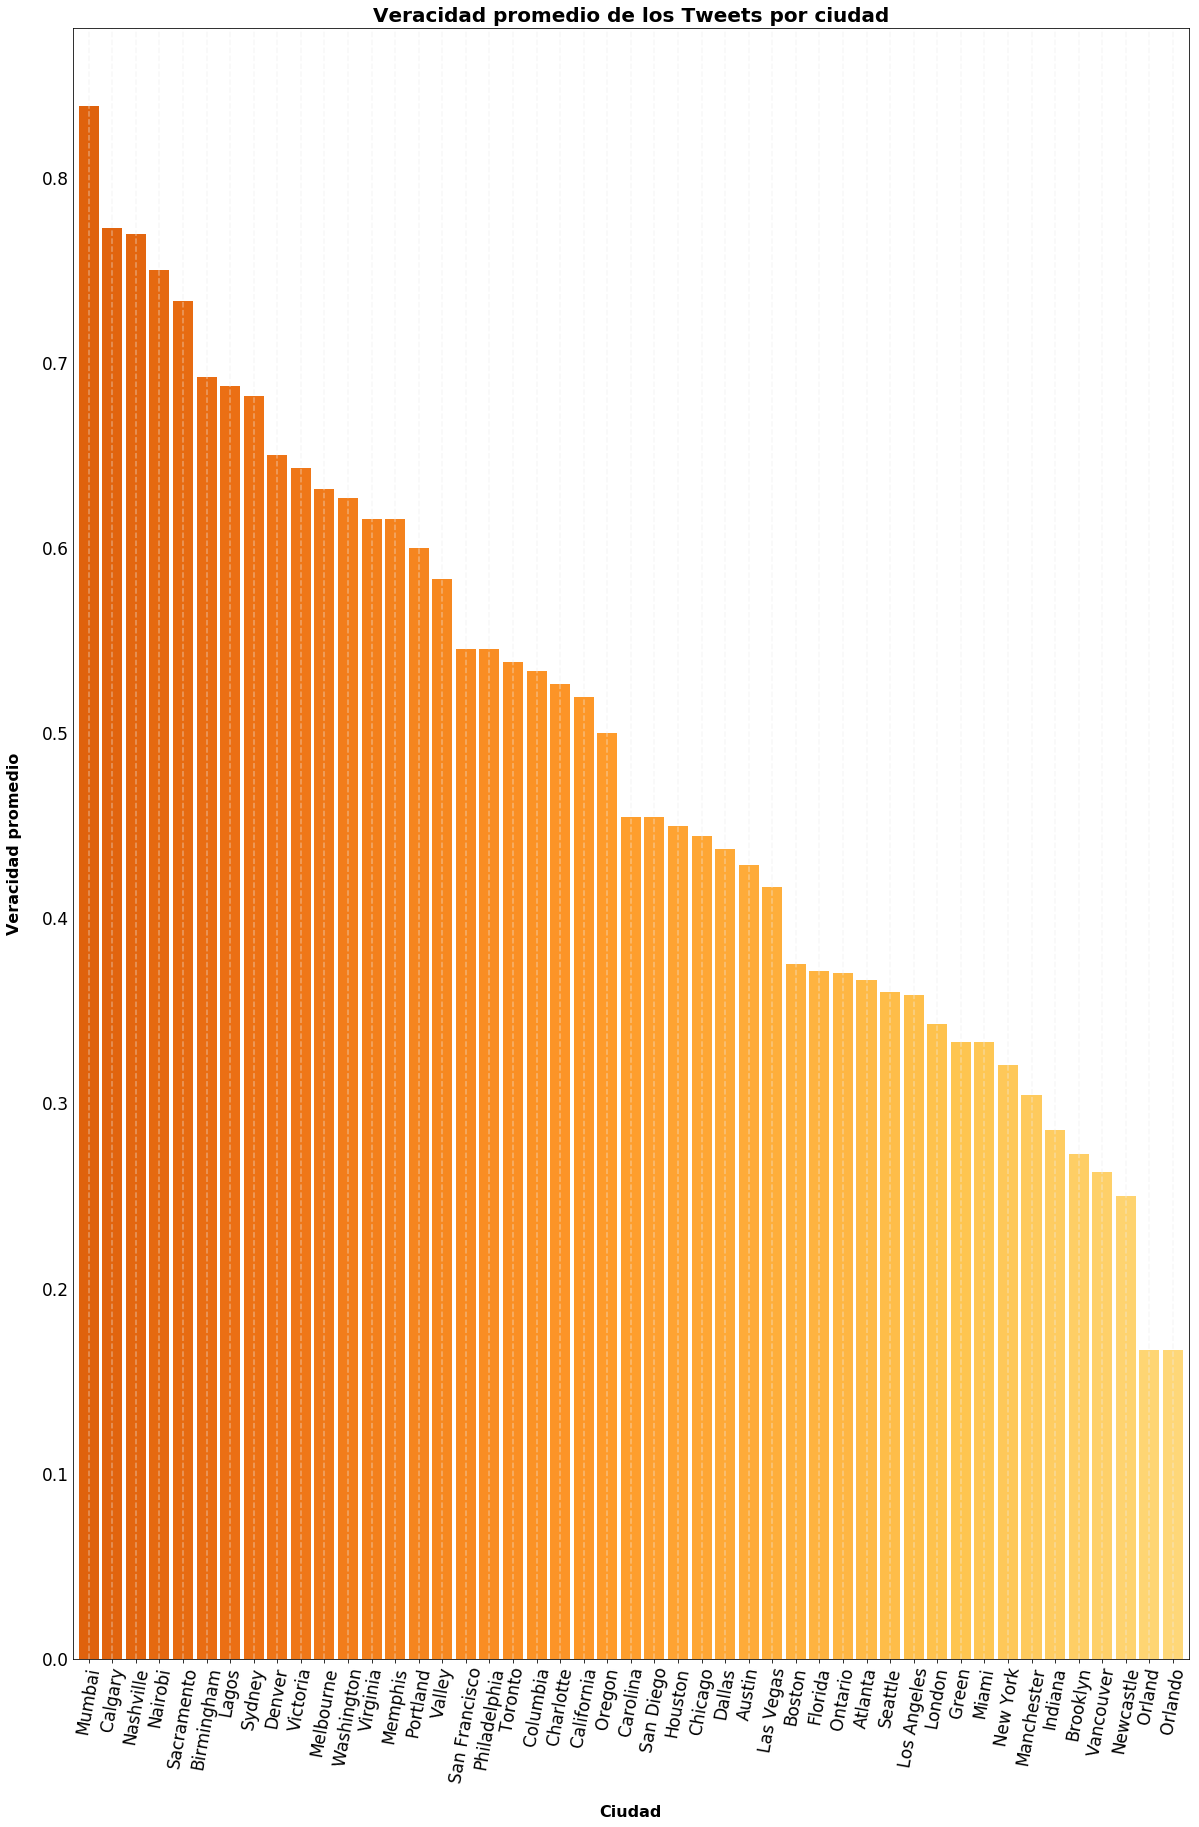

In [28]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('veracidad')
Top_populares_plot = Top_populares.plot(kind='bar', y ='veracidad', x = 'city_ascii', figsize=(20, 30), color=colores, width=0.85, legend = False)

plt.xticks(np.arange(0, 47, 1), rotation = 80, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tick_params(axis='y', length=0)

#Top_populares_plot.spines['right'].set_visible(False)
#Top_populares_plot.spines['top'].set_visible(False)
#Top_populares_plot.spines['left'].set_visible(False)
#Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

plt.gca().invert_xaxis()
        
Top_populares_plot.set_xlabel("Ciudad", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Veracidad promedio", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Veracidad promedio de los Tweets por ciudad", weight='bold', size=20)

In [29]:
ciudades_list['Pais'] = ciudades['country']

In [30]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [31]:
ciudades_list = ciudades_list.drop_duplicates('city_ascii', keep = 'first')

In [32]:
ciudades_list.shape

(13482, 5)

In [33]:
Tweets_Paises = pd.DataFrame({'Cantidad_Tweets': 0, 'Pais': ciudades['country'], 'Veracidad': 0, 'Cantidad_Tweets_Verdaderos': 0})

In [34]:
Tweets_Paises['Veracidad'] = Tweets_Paises['Veracidad'].astype(float)

In [35]:
Tweets_Paises['Pais'].describe()

count             15493
unique              223
top       United States
freq               7328
Name: Pais, dtype: object

In [36]:
Tweets_Paises = Tweets_Paises.drop_duplicates(['Pais'])
Tweets_Paises = Tweets_Paises.reset_index(drop = True)

In [37]:
Tweets_Paises.dtypes

Cantidad_Tweets                 int64
Cantidad_Tweets_Verdaderos      int64
Pais                           object
Veracidad                     float64
dtype: object

In [38]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
Pais                object
dtype: object

In [39]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [40]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(Tweets_Paises['Pais'].count()):
    
    pais = Tweets_Paises.loc[w, 'Pais']
    
    la_ciudad_es_del_pais = (ciudades_list.loc[:, 'Pais'] == pais)
    
    ciudades_del_pais = ciudades_list.loc[la_ciudad_es_del_pais]
    
    total_tweets_pais = ciudades_del_pais['ocurrencia'].sum()

    total_tweets_verdaderos_pais = ciudades_del_pais['cant_verdaderos'].sum()
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets'] = total_tweets_pais
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets_Verdaderos'] = total_tweets_verdaderos_pais
    
    if (total_tweets_pais != 0):
        
        Tweets_Paises.loc[w, 'Veracidad'] = float(total_tweets_verdaderos_pais)/float(total_tweets_pais)

In [41]:
Tweets_Paises

,Cantidad_Tweets,Cantidad_Tweets_Verdaderos,Pais,Veracidad
0,13,7,Japan,0.538462
1,1906,839,United States,0.440189
2,8,4,Mexico,0.500000
3,75,52,India,0.693333
4,16,5,Brazil,0.312500
5,3,1,China,0.333333
6,2,2,Bangladesh,1.000000
7,8,3,Argentina,0.375000
8,14,12,Pakistan,0.857143
9,6,4,Egypt,0.666667


In [42]:
Tweets_Paises['Cantidad_Tweets'].sum()

2935

In [43]:
paises_mas_10_tweets = (Tweets_Paises.loc[:,'Cantidad_Tweets'] > 10)

In [44]:
paises_mas_10_tweets = Tweets_Paises.loc[paises_mas_10_tweets]

In [45]:
paises_mas_10_tweets = paises_mas_10_tweets.sort_values('Cantidad_Tweets')

Text(0.5,1,'Paises con mayor cantidad de Tweets')

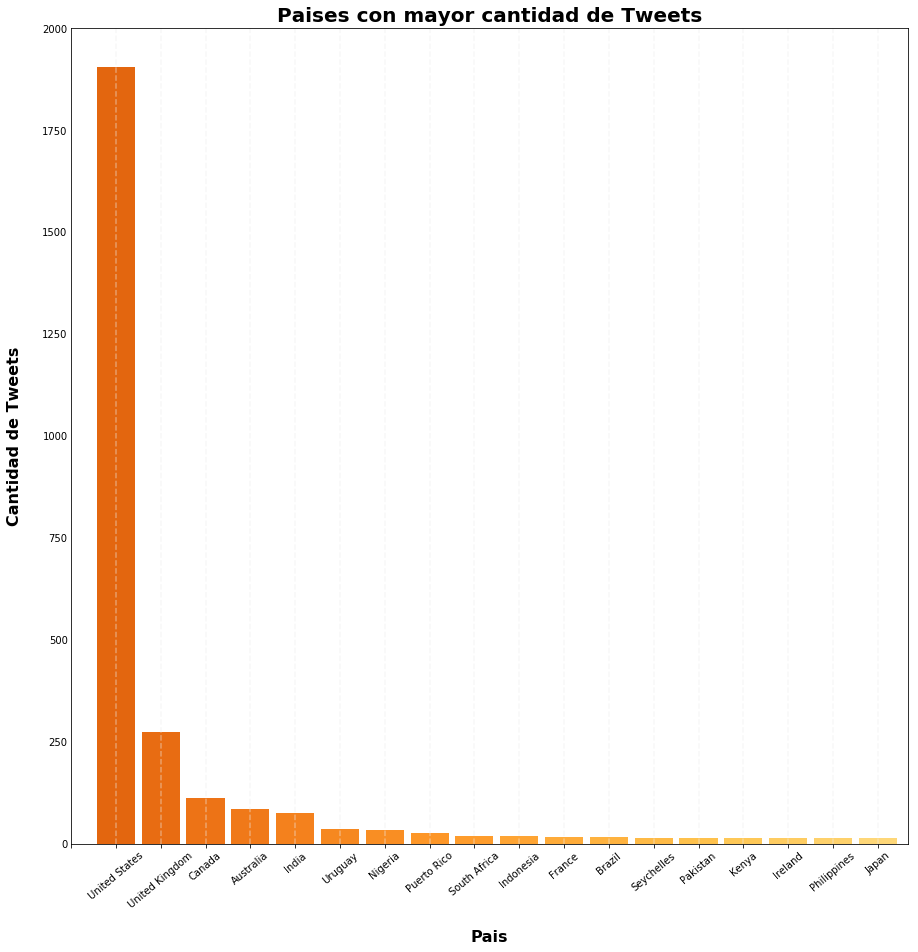

In [46]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='bar', y ='Cantidad_Tweets', x = 'Pais', figsize=(15, 15), color=colores, width=0.85, legend = False)

plt.xticks(np.arange(0, 19, 1.0))
plt.tick_params(axis='y', length=0)

#paises_mas_10_tweets_plot.spines['right'].set_visible(False)
#paises_mas_10_tweets_plot.spines['top'].set_visible(False)
#paises_mas_10_tweets_plot.spines['left'].set_visible(False)
#paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
plt.xticks(fontsize = 10, rotation = 40)
plt.yticks(fontsize = 10)

plt.gca().invert_xaxis()

paises_mas_10_tweets_plot.set_xlabel("Pais", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Veracidad promedio de los Tweets por pais')

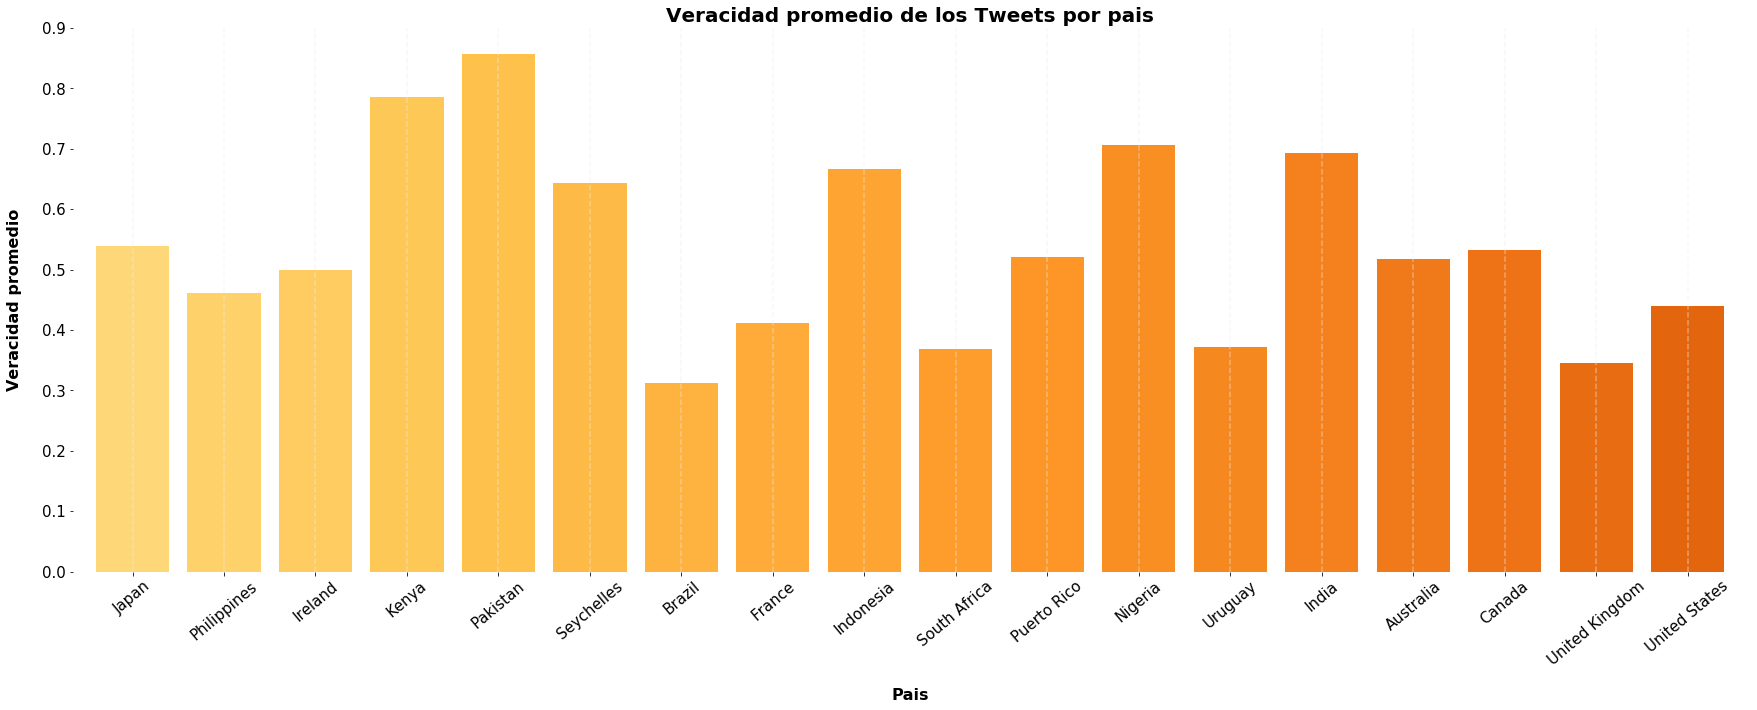

In [47]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='bar', y ='Veracidad', x = 'Pais', figsize=(30,10), color=colores, width=0.80, legend = False)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
             
plt.xticks(fontsize = 15, rotation = 40)
plt.yticks(fontsize = 15)

paises_mas_10_tweets_plot.set_xlabel("Pais", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Veracidad promedio", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Veracidad promedio de los Tweets por pais", weight='bold', size=20)

Veracidad de los tweets cuando la locacion es "valida"

In [48]:
Tweets_Location_Valida = Tweets_Paises['Cantidad_Tweets'].sum()
Tweets_Location_Valida

2935

In [49]:
Tweets_Location_Valida_Verdaderos  = Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum()
Tweets_Location_Valida_Verdaderos

1334

In [50]:
float(Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())/float(Tweets_Paises['Cantidad_Tweets'].sum())

0.4545144804088586

------------------------------------------------------------------------------------------------------------------

In [51]:
Tweets_Location_Invalida_Verdaderos = (tweets['target'].sum() - Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())
Tweets_Location_Invalida_Verdaderos

1937

In [52]:
Tweets_Location_Invalida = (tweets['id'].count() - Tweets_Paises['Cantidad_Tweets'].sum())
Tweets_Location_Invalida

4678

In [53]:
float(Tweets_Location_Invalida_Verdaderos)/float(Tweets_Location_Invalida)

0.41406584010260794

In [54]:
cantidad_segun_validez = (Tweets_Location_Valida, Tweets_Location_Invalida)

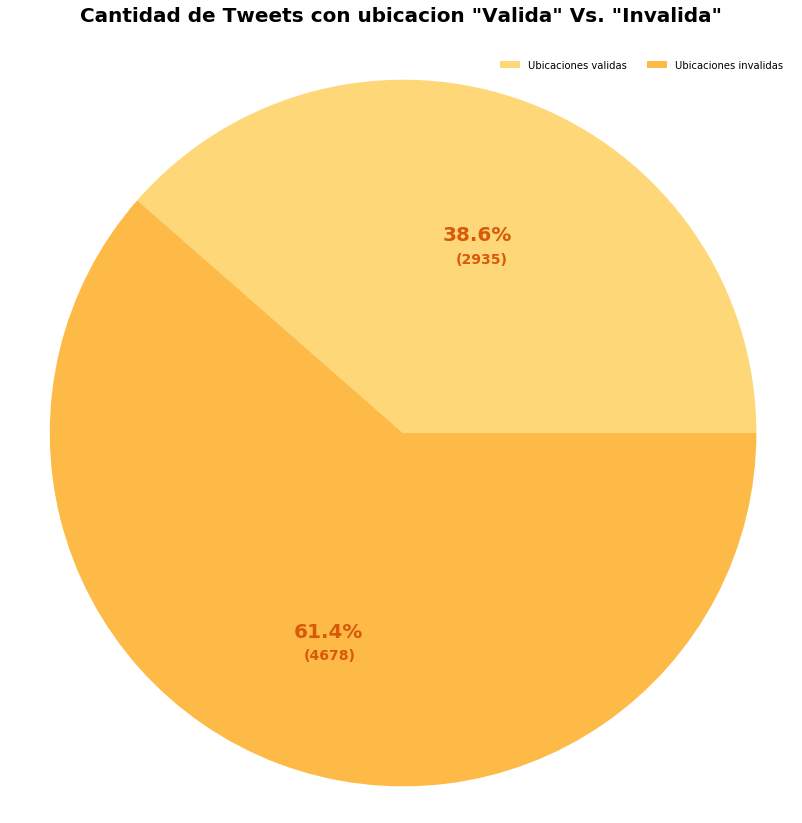

In [55]:
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)

plt.figure(figsize=(14,14))
pie_chart = plt.subplot()


a,b, autotexts = pie_chart.pie(cantidad_segun_validez, colors= [colores[0], colores[5]], autopct='%1.1f%%')

for autotext in autotexts:
    autotext.set_color(color=colores[19])
    autotext.set_fontsize(20)
    autotext.set_fontweight('bold')


pie_chart.text(0.15, 0.48, '(' + str(cantidad_segun_validez[0])+')', color=colores[19], fontweight='bold', fontsize=14)
pie_chart.text(-0.28, -0.64, '(' +str(cantidad_segun_validez[1])+')', color=colores[19], fontweight='bold', fontsize=14) 
pie_chart.legend(["Ubicaciones validas", "Ubicaciones invalidas"], frameon=False, loc='best', ncol=2)
plt.title('Cantidad de Tweets con ubicacion "Valida" Vs. "Invalida"', weight='bold', size=20, pad=30)
plt.axis('equal')
plt.show()

Cuando la location es invalida hay una ligera diferencia entre la veracidad de los Tweets

In [56]:
ciudades_list = ciudades_list.reset_index(drop = True)

In [57]:
ciudades = ciudades.drop_duplicates('city_ascii', keep = 'first')

In [58]:
ciudades = ciudades.reset_index(drop = True) # A ciudades_list ya le habia hecho el drop_duplicates antes.

In [59]:
ciudades_list['cant_habitantes'] = ciudades['population']

In [60]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais,cant_habitantes
0,Tokyo,8,0.500000,4,Japan,35676000.0
1,New York,131,0.320611,42,United States,19354922.0
2,Mexico City,1,0.000000,0,Mexico,19028000.0
3,Mumbai,31,0.838710,26,India,18978000.0
4,Sao Paulo,2,0.500000,1,Brazil,18845000.0
5,Delhi,10,0.600000,6,India,15926000.0
6,Shanghai,1,0.000000,0,China,14987000.0
7,Kolkata,3,0.333333,1,India,14787000.0
8,Los Angeles,53,0.358491,19,United States,12815475.0
9,Dhaka,2,1.000000,2,Bangladesh,12797394.0


In [61]:
Ciudades_Mas_De_5_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 5)

In [62]:
cmap = cm.get_cmap('YlOrBr')
paleta = cmap(np.linspace(0.3, 0.9,100))

colores_rgb = []
for i in paleta:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb.append((aux))

In [63]:
type(colores_rgb)

list

In [64]:
# prepare some data
x = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['veracidad']
y = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['ocurrencia']
radii = np.sqrt(ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['cant_habitantes'])/7e4
colors = [
    "#%02x%02x%02x" % i for i in colores_rgb
]

# output to static HTML file (with CDN resources)
output_file("Veracidad_Vs_Cantidad de Tweets.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select, save"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 1), y_range=(0, 150), width=1000, height=1000)

# add a circle renderer with vectorized colors and sizes
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

p.title.text = "Veracidad Vs. Cantidad de Tweets (Por ciudad)"
p.legend.location = "top"
p.xaxis.axis_label = 'Veracidad promedio'
p.yaxis.axis_label = 'Cantidad de Tweets'

# show the results
show(p)

/home/ezezbogar/anaconda2/lib/python2.7/site-packages/bokeh/models/plots.py:756: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [65]:
# prepare some data
x = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['veracidad']
y = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['cant_habitantes']/1e5
radii = np.sqrt(ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['ocurrencia'])/1e2
# output to static HTML file (with CDN resources)
output_file("Veracidad_Vs_Cantidad de Habitantes.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select, save"

# create a new plot with the tools above, and explicit ranges
q = figure(tools=TOOLS, x_range=(0, 1), y_range=(0, 150), width=800, height=1000)

# add a circle renderer with vectorized colors and sizes
q.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

q.title.text = "Veracidad Vs. Cantidad de Habitantes (Por ciudad)"
q.legend.location = "top"
q.xaxis.axis_label = 'Veracidad promedio'
q.yaxis.axis_label = 'Cantidad de Habitantes (x1e5)'

# show the results
show(q)

In [66]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [67]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [68]:
world.count()

pop_est       177
continent     177
name          177
iso_a3        177
gdp_md_est    177
geometry      177
dtype: int64

In [69]:
iso3 = pd.DataFrame({'iso3': ciudades['iso3']})
iso3 = iso3.drop_duplicates('iso3', keep = 'first')
iso3 = iso3.reset_index(drop = True)
Tweets_Paises['iso3']=iso3['iso3']

In [70]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(world['name'].count()):
    
    code_pais = world.loc[w, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[w, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 5:
        
        world.loc[w, 'veracidad'] = codigo_del_pais['Veracidad'].sum()

In [71]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,veracidad
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.531532
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.440189
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.500000
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",0.666667
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",0.375000


In [72]:
#CUIDADO AL EJECUTAR ESTO xD
for z in range(world['name'].count()):
    
    code_pais = world.loc[z, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[z, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 5:
        
        world.loc[z, 'Cantidad_Tweets'] = codigo_del_pais['Cantidad_Tweets'].sum()

In [73]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(world['name'].count()):
    
    code_pais = world.loc[w, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[w, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 5:
        
        world.loc[w, 'veracidad'] = codigo_del_pais['Veracidad'].sum()

In [74]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,veracidad,Cantidad_Tweets
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.531532,111.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.440189,1906.0
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.500000,6.0
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",0.666667,18.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",0.375000,8.0


/home/ezezbogar/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


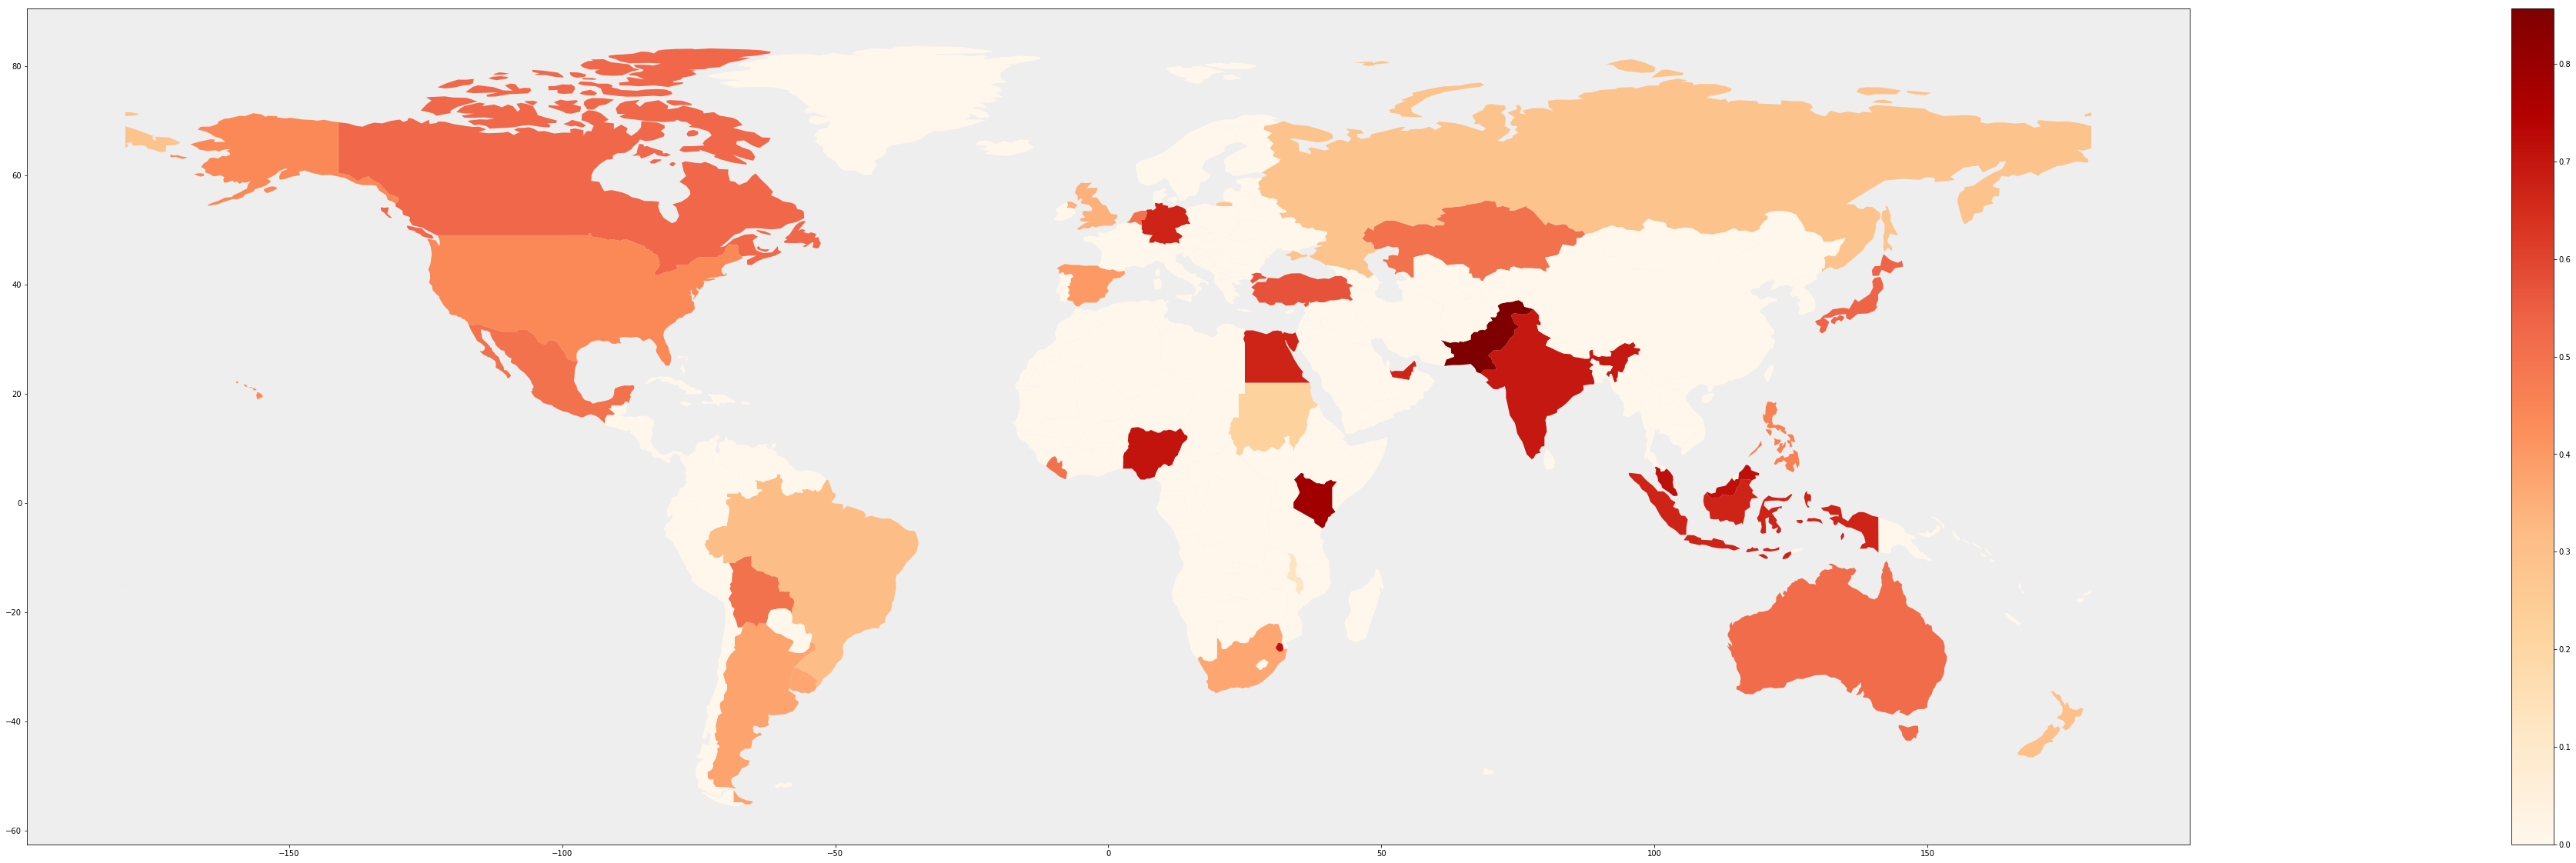

In [76]:
fig, ax = plt.subplots(figsize = (150, 20))
saltos = np.linspace(0.2, 1, 100)
cmap(saltos)
world = world[world.name!="Antarctica"]

ax.patch.set_facecolor('#eeeeee')
world.plot(column='veracidad', ax = ax, legend = True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})